# 1. MNIST Dataset Exploration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

📦 Loading MNIST dataset...


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 498kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.60MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.38MB/s]


   Training set size: 60000
   Test set size: 10000
   Image dimensions: 28x28 = 784 pixels
   Number of classes: 10 (digits 0-9)

🎨 Dataset Visualization Analysis:


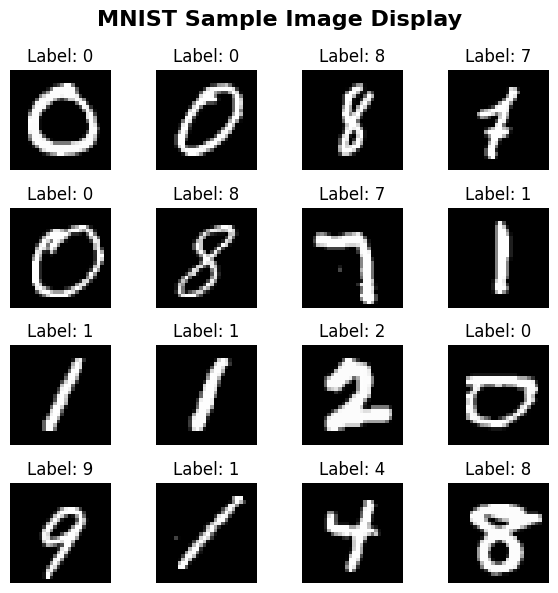

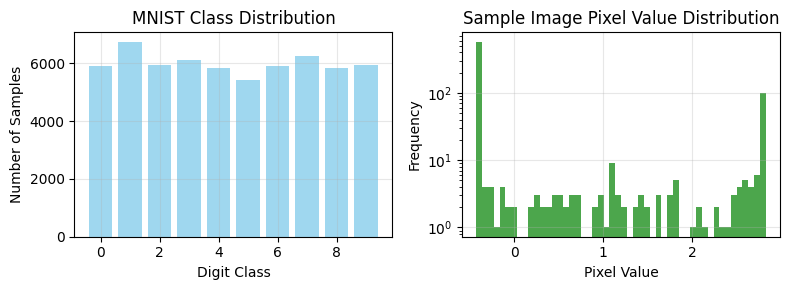

   Data type: torch.float32
   Pixel value range: [-0.424, 2.821]
   Image shape: torch.Size([1, 28, 28])


In [ ]:
class MNISTExplorer:
    """MNIST Dataset Exploration and Visualization"""

    def __init__(self):
        # Data transformation: Convert PIL(Python Imaging Library) image to tensor and normalize
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))  # Mean and standard deviation for MNIST
        ])

    def load_data(self):
        """Loads the MNIST dataset"""
        print("📦 Loading MNIST dataset...")

        # Download and load training and test sets
        train_dataset = datasets.MNIST('data', train=True, download=True, transform=self.transform)
        test_dataset = datasets.MNIST('data', train=False, transform=self.transform)

        print(f"   Training set size: {len(train_dataset)}")
        print(f"   Test set size: {len(test_dataset)}")
        print(f"   Image dimensions: 28x28 = 784 pixels")
        print(f"   Number of classes: 10 (digits 0-9)")

        return train_dataset, test_dataset

    def visualize_dataset(self, dataset):
        """Visualizes dataset samples"""
        print("\n🎨 Dataset Visualization Analysis:")

        # Create data loader
        dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
        images, labels = next(iter(dataloader))

        # Display sample images
        fig, axes = plt.subplots(4, 4, figsize=(6, 6))
        fig.suptitle('MNIST Sample Image Display', fontsize=16, fontweight='bold')

        for i in range(16):
            row, col = i // 4, i % 4
            # Convert tensor to numpy array and un-normalize
            img = images[i].squeeze()

            axes[row, col].imshow(img, cmap='gray')
            axes[row, col].set_title(f'Label: {labels[i].item()}', fontsize=12)
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.show()

        # Statistics of class distribution
        all_labels = []
        for _, label in dataset:
            all_labels.append(label)

        plt.figure(figsize=(8, 3))

        # Class distribution
        plt.subplot(1, 2, 1)
        unique_labels, counts = np.unique(all_labels, return_counts=True)
        plt.bar(unique_labels, counts, alpha=0.8, color='skyblue')
        plt.xlabel('Digit Class')
        plt.ylabel('Number of Samples')
        plt.title('MNIST Class Distribution')
        plt.grid(True, alpha=0.3)

        # Pixel value distribution
        plt.subplot(1, 2, 2)
        sample_image = images[0].squeeze().numpy()
        plt.hist(sample_image.flatten(), bins=50, alpha=0.7, color='green', log=True)
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.title('Sample Image Pixel Value Distribution')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        print(f"   Data type: {images.dtype}")
        print(f"   Pixel value range: [{images.min():.3f}, {images.max():.3f}]")
        print(f"   Image shape: {images[0].shape}")

# Perform data exploration
explorer = MNISTExplorer()
train_dataset, test_dataset = explorer.load_data()
explorer.visualize_dataset(train_dataset)

# 2. MLP Implementation based on PyTorch


🚀 Starting PyTorch MLP model training:
   Using device: cuda
🏗️ MLP Network Structure:
   Input Layer: 784 neurons
   Hidden Layer 1: 512 neurons (ReLU)
   Hidden Layer 2: 256 neurons (ReLU)
   Output Layer: 10 neurons
   Total parameters: 535818
Layer: network.0.weight | Size: torch.Size([512, 784]) | Number of parameters: 401408
Layer: network.0.bias | Size: torch.Size([512]) | Number of parameters: 512
Layer: network.2.weight | Size: torch.Size([256, 512]) | Number of parameters: 131072
Layer: network.2.bias | Size: torch.Size([256]) | Number of parameters: 256
Layer: network.4.weight | Size: torch.Size([10, 256]) | Number of parameters: 2560
Layer: network.4.bias | Size: torch.Size([10]) | Number of parameters: 10
   Number of epochs: 10
   Optimizer: Adam (lr=0.001)
   Loss function: CrossEntropyLoss
   Epoch  1: Loss=0.1948, Train Acc=94.11%, Test Acc=96.98%
   Epoch  2: Loss=0.0851, Train Acc=97.39%, Test Acc=96.97%
   Epoch  3: Loss=0.0630, Train Acc=98.00%, Test Acc=97.30%
  

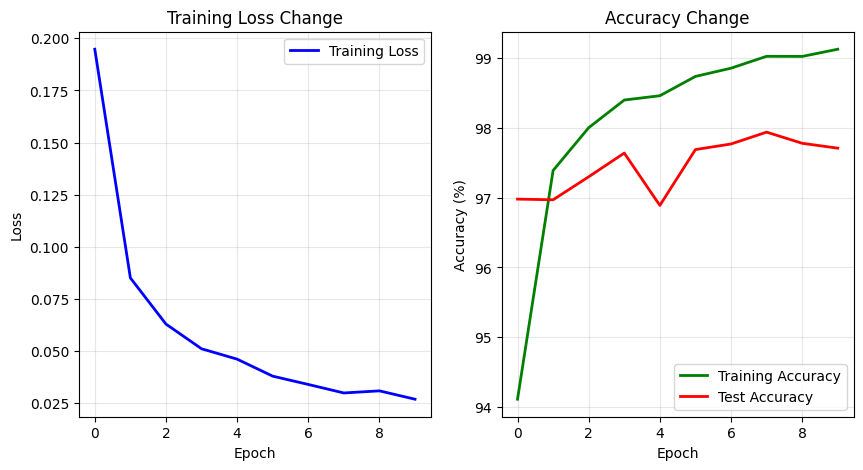

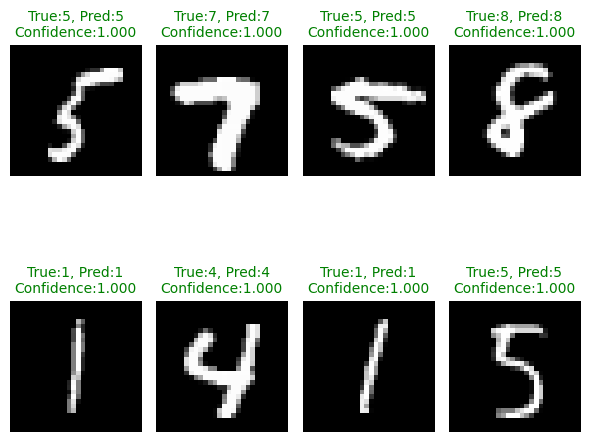

In [ ]:
class MLP_PyTorch(nn.Module):
    """Multilayer Perceptron implementation based on PyTorch"""

    def __init__(self, input_size=784, hidden_sizes=[512, 256], num_classes=10):
        """
        Initializes the MLP network

        Args:
            input_size: Input feature dimension (28*28=784)
            hidden_sizes: List of neuron counts for hidden layers
            num_classes: Number of output classes (10 digits)
        """
        super(MLP_PyTorch, self).__init__()

        # Build network layers
        layers = []
        prev_size = input_size

        # Add hidden layers
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size

        # Add output layer
        layers.append(nn.Linear(prev_size, num_classes))

        # Combine all layers
        self.network = nn.Sequential(*layers)

        # Parameter initialization
        self._initialize_weights()

        print(f"🏗️ MLP Network Structure:")
        print(f"   Input Layer: {input_size} neurons")
        for i, size in enumerate(hidden_sizes):
            print(f"   Hidden Layer {i+1}: {size} neurons (ReLU)")
        print(f"   Output Layer: {num_classes} neurons")
        print(f"   Total parameters: {sum(p.numel() for p in self.parameters())}")
        for name, param in self.named_parameters():
            print(f"Layer: {name} | Size: {param.size()} | Number of parameters: {param.numel()}")


    def _initialize_weights(self):
        """Initialize weights using He initialization"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        """Forward pass"""
        # Flatten input: (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.view(x.size(0), -1)

        # Pass through the network
        logits = self.network(x)

        return logits

    def predict_proba(self, x):
        """Returns probability predictions"""
        with torch.no_grad():
            if next(self.parameters()).is_cuda:
                x = x.cuda()
            logits = self.forward(x)
            probabilities = F.softmax(logits, dim=1)
        return probabilities

def train_pytorch_model():
    """Trains the PyTorch MLP model"""
    print("\n🚀 Starting PyTorch MLP model training:")

    # Device selection
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"   Using device: {device}")

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

    # Initialize model
    model = MLP_PyTorch(hidden_sizes=[512, 256]).to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Training parameters
    num_epochs = 10
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    print(f"   Number of epochs: {num_epochs}")
    print(f"   Optimizer: Adam (lr=0.001)")
    print(f"   Loss function: CrossEntropyLoss")

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            # images shape: (batch_size, channels, height, width) -> (64, 1, 28, 28)
            # labels shape: (batch_size,) -> (64, )
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            # outputs shape: (batch_size, num_classes) -> (64, 10)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = outputs.max(dim=1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        # Calculate accuracy
        train_acc = 100. * correct / total
        avg_loss = running_loss / len(train_loader)

        # Test set evaluation
        model.eval()
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = outputs.max(1)
                test_total += labels.size(0)
                test_correct += predicted.eq(labels).sum().item()

        test_acc = 100. * test_correct / test_total

        # Record results
        train_losses.append(avg_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"   Epoch {epoch+1:2d}: Loss={avg_loss:.4f}, Train Acc={train_acc:.2f}%, Test Acc={test_acc:.2f}%")

    return model, train_losses, train_accuracies, test_accuracies

# Train PyTorch model
pytorch_model, train_losses, train_accs, test_accs = train_pytorch_model()

# Visualize training process
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b-', linewidth=2, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Change')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(train_accs, 'g-', linewidth=2, label='Training Accuracy')
plt.plot(test_accs, 'r-', linewidth=2, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Change')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction example
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)
images, labels = next(iter(test_loader))
predictions = pytorch_model.predict_proba(images)
predicted_labels = predictions.argmax(dim=1)

# Display prediction results
fig, axes = plt.subplots(2, 4, figsize=(6, 6))
for i in range(8):
    row, col = i // 4, i % 4
    img = images[i].squeeze()

    axes[row, col].imshow(img, cmap='gray')
    true_label = labels[i].item()
    pred_label = predicted_labels[i].item()
    confidence = predictions[i].max().item()

    color = 'green' if true_label == pred_label else 'red'
    axes[row, col].set_title(f'True:{true_label}, Pred:{pred_label}\nConfidence:{confidence:.3f}',
                            color=color, fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# 3. HandwrittenMLP

🔧 Handwritten MLP Initialization:
   Network Structure: [784, 512, 256, 10]
   Learning Rate: 0.01
   Activation Function: relu
   W1 Shape: (784, 512)
   b1 Shape: (1, 512)
   W2 Shape: (512, 256)
   b2 Shape: (1, 256)
   W3 Shape: (256, 10)
   b3 Shape: (1, 10)
   Epoch  1: Loss=0.3847, Train Acc=88.79%, Test Acc=93.42%
   Epoch  2: Loss=0.1961, Train Acc=94.39%, Test Acc=94.82%
   Epoch  3: Loss=0.1514, Train Acc=95.63%, Test Acc=95.70%
   Epoch  4: Loss=0.1248, Train Acc=96.46%, Test Acc=96.23%
   Epoch  5: Loss=0.1053, Train Acc=96.98%, Test Acc=96.51%
   Epoch  6: Loss=0.0911, Train Acc=97.46%, Test Acc=96.67%
   Epoch  7: Loss=0.0799, Train Acc=97.77%, Test Acc=97.09%
   Epoch  8: Loss=0.0709, Train Acc=98.05%, Test Acc=97.20%
   Epoch  9: Loss=0.0632, Train Acc=98.29%, Test Acc=97.40%
   Epoch 10: Loss=0.0570, Train Acc=98.49%, Test Acc=97.42%
✅ Training complete! Final test accuracy: 97.42%


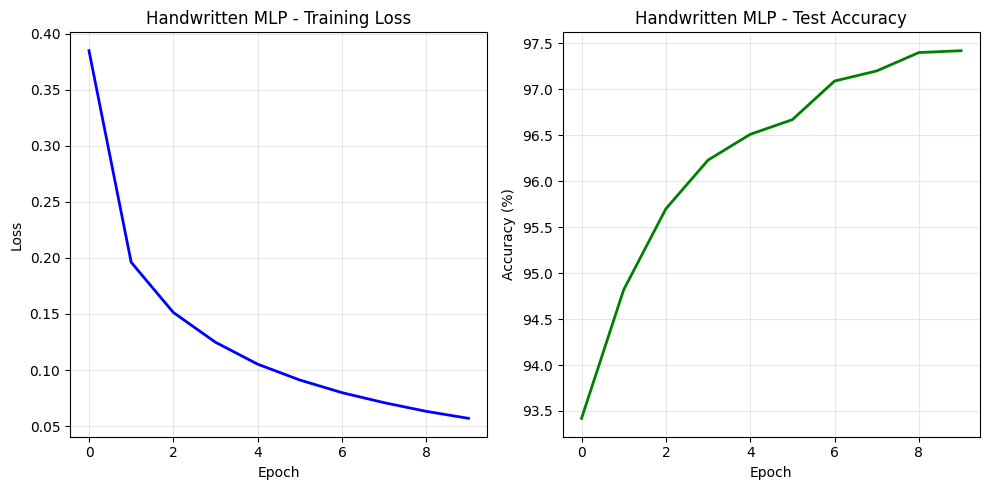

In [ ]:
class HandwrittenMLP:
    """Completely handwritten Multilayer Perceptron implementation"""

    def __init__(self, layer_sizes, learning_rate=0.01, activation='relu'):
        """
        Initializes handwritten MLP

        Args:
            layer_sizes: Number of neurons in each layer [784, 512, 256, 10]
            learning_rate: Learning rate
            activation: Type of activation function
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.learning_rate = learning_rate
        self.activation_type = activation

        # Initialize weights and biases
        self.weights = {}
        self.biases = {}

        print(f"🔧 Handwritten MLP Initialization:")
        print(f"   Network Structure: {layer_sizes}")
        print(f"   Learning Rate: {learning_rate}")
        print(f"   Activation Function: {activation}")

        # He initialization
        for i in range(self.num_layers - 1):
            # He initialization: Suitable for ReLU activation function
            fan_in = layer_sizes[i]
            self.weights[f'W{i+1}'] = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / fan_in)
            self.biases[f'b{i+1}'] = np.zeros((1, layer_sizes[i+1]))

            print(f"   W{i+1} Shape: {self.weights[f'W{i+1}'].shape}")
            print(f"   b{i+1} Shape: {self.biases[f'b{i+1}'].shape}")

        # Training history
        self.training_history = {
            'loss': [],
            'accuracy': [],
            'gradients': []
        }

    def activation_function(self, x, derivative=False):
        """Activation function and its derivative"""
        if self.activation_type == 'relu':
            if derivative:
                return (x > 0).astype(float)
            return np.maximum(0, x)

        elif self.activation_type == 'sigmoid':
            if derivative:
                s = 1 / (1 + np.exp(-np.clip(x, -500, 500)))
                return s * (1 - s)
            return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

        elif self.activation_type == 'tanh':
            if derivative:
                return 1 - np.tanh(x) ** 2
            return np.tanh(x)

    def softmax(self, x):
        """Softmax function implementation"""
        # Numerically stable softmax
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward_pass(self, X):
        # Store intermediate results for backpropagation
        self.activations = {'a0': X}  # Input layer
        self.z_values = {}

        current_input = X

        # Through hidden layers
        for i in range(self.num_layers - 2):
            # Linear transformation
            z = current_input @ self.weights[f'W{i+1}'] + self.biases[f'b{i+1}']
            self.z_values[f'z{i+1}'] = z

            # Activation function
            a = self.activation_function(z)
            self.activations[f'a{i+1}'] = a

            current_input = a

        # Output layer (using softmax)
        final_layer_idx = self.num_layers - 1
        z_final = current_input @ self.weights[f'W{final_layer_idx}'] + self.biases[f'b{final_layer_idx}']
        self.z_values[f'z{final_layer_idx}'] = z_final

        # Softmax output
        output = self.softmax(z_final)
        self.activations[f'a{final_layer_idx}'] = output

        return output

    def compute_loss(self, y_true, y_pred):
        """
        Computes cross-entropy loss

        Mathematical formula:
        L = -1/N * Σ(y_true * log(y_pred))
        """
        # Avoid log(0)
        y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)

        # Cross-entropy loss
        loss = -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))

        return loss

    def backward_pass(self, X, y_true, y_pred):
        """
        Backpropagation algorithm

        Core mathematical principles:
        1. Output layer error: δ^(L) = (a^(L) - y)
        2. Hidden layer error: δ^(l) = (δ^(l+1) * W^(l+1)^T) ⊙ σ'(z^(l))
        3. Weight gradient: ∂L/∂W^(l) = a^(l-1)^T * δ^(l)
        4. Bias gradient: ∂L/∂b^(l) = Σδ^(l)
        """
        m = X.shape[0]  # batch size
        gradients = {}

        # Output layer error (derivative of softmax + cross-entropy)
        delta = y_pred - y_true

        # Backpropagate to compute gradients
        # class range(start, stop, step=1)
        for i in range(self.num_layers - 1, 0, -1):
            # Gradients for current layer's weights and biases
            if i == 1:
                # First layer, previous layer is input
                prev_activation = self.activations['a0']
            else:
                prev_activation = self.activations[f'a{i-1}']

            # Weight gradient
            gradients[f'dW{i}'] = prev_activation.T @ delta / m

            # Bias gradient
            gradients[f'db{i}'] = np.mean(delta, axis=0, keepdims=True)

            # Propagate to previous layer (except input layer)
            if i > 1:
                # Compute error for the previous layer
                delta = (delta @ self.weights[f'W{i}'].T) * self.activation_function(
                    self.z_values[f'z{i-1}'], derivative=True)

        return gradients

    def update_parameters(self, gradients):
        """Update parameters using gradient descent"""
        for i in range(1, self.num_layers):
            self.weights[f'W{i}'] -= self.learning_rate * gradients[f'dW{i}']
            self.biases[f'b{i}'] -= self.learning_rate * gradients[f'db{i}']

    def one_hot_encode(self, y, num_classes=10):
        """Converts labels to one-hot encoding"""
        one_hot = np.zeros((len(y), num_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot

    def train(self, X_train, y_train, X_test, y_test, epochs=50, batch_size=64):
        """Complete training process"""
        # Convert labels to one-hot
        y_train_onehot = self.one_hot_encode(y_train)
        y_test_onehot = self.one_hot_encode(y_test)

        n_batches = len(X_train) // batch_size

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_correct = 0

            # Shuffle data
            indices = np.random.permutation(len(X_train))
            X_train_shuffled = X_train[indices]
            y_train_onehot_shuffled = y_train_onehot[indices]

            # Batch training
            for batch in range(n_batches):
                start_idx = batch * batch_size
                end_idx = start_idx + batch_size

                # X_batch.shape: (64, 784), y_batch.shape: (64, 10)
                X_batch = X_train_shuffled[start_idx:end_idx]
                y_batch = y_train_onehot_shuffled[start_idx:end_idx]

                # Forward pass
                y_pred = self.forward_pass(X_batch)

                # Compute loss
                loss = self.compute_loss(y_batch, y_pred)
                epoch_loss += loss

                # Compute accuracy
                predictions = np.argmax(y_pred, axis=1)
                actual = np.argmax(y_batch, axis=1)
                epoch_correct += np.sum(predictions == actual)

                # Backward pass
                gradients = self.backward_pass(X_batch, y_batch, y_pred)

                # Update parameters
                self.update_parameters(gradients)

            # Calculate epoch statistics
            avg_loss = epoch_loss / n_batches
            train_accuracy = epoch_correct / (n_batches * batch_size) * 100

            # Test set evaluation
            test_pred = self.forward_pass(X_test)
            test_predictions = np.argmax(test_pred, axis=1)
            test_accuracy = np.mean(test_predictions == y_test) * 100

            # Record history
            self.training_history['loss'].append(avg_loss)
            self.training_history['accuracy'].append(test_accuracy)

            # Print progress
            print(f"   Epoch {epoch+1:2d}: Loss={avg_loss:.4f}, "
                  f"Train Acc={train_accuracy:.2f}%, Test Acc={test_accuracy:.2f}%")

        print(f"✅ Training complete! Final test accuracy: {test_accuracy:.2f}%")

    def predict(self, X):
        """Predicts"""
        output = self.forward_pass(X)
        return np.argmax(output, axis=1)

    def visualize_training(self):
        """Visualize training process"""
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.training_history['loss'], 'b-', linewidth=2)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Handwritten MLP - Training Loss')
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(self.training_history['accuracy'], 'g-', linewidth=2)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title('Handwritten MLP - Test Accuracy')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Prepare data for handwritten MLP
def prepare_numpy_data():
    """Prepares data in numpy format"""
    # Convert training data
    train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

    # train.images.shape: (60000, 1, 28, 28), train_labels.shape: (60000, )
    train_images, train_labels = next(iter(train_loader))
    test_images, test_labels = next(iter(test_loader))

    # Convert to numpy and flatten
    # X_train.shape: (60000, 784), y_train.shape: (60000, )
    # X_test.shape:  (10000, 784), y_test.shape:  (10000, )
    X_train = train_images.view(-1, 784).numpy()
    y_train = train_labels.numpy()
    X_test = test_images.view(-1, 784).numpy()
    y_test = test_labels.numpy()

    return X_train, y_train, X_test, y_test

# Prepare data and train handwritten MLP
X_train_np, y_train_np, X_test_np, y_test_np = prepare_numpy_data()

# Create and train handwritten MLP
handwritten_mlp = HandwrittenMLP(
    layer_sizes=[784, 512, 256, 10],
    learning_rate=0.01,
    activation='relu'
)

# Train the model
handwritten_mlp.train(X_train_np, y_train_np, X_test_np, y_test_np, epochs=10, batch_size=64)

# Visualize training process
handwritten_mlp.visualize_training()

# Mathematical Principles and Implementation of Activation Functions

🔥 Part 2: Mathematical Principles and Implementation of Activation Functions
--------------------------------------------------
📈 Activation Function Visualization and Feature Analysis:


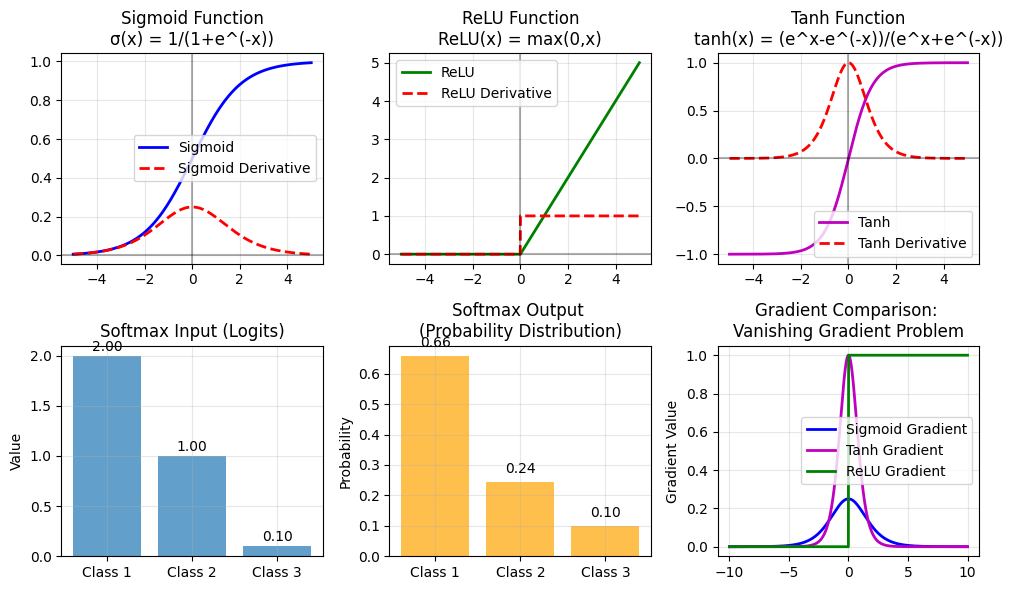

In [ ]:
print("🔥 Part 2: Mathematical Principles and Implementation of Activation Functions")
print("-"*50)

class ActivationFunctions:
    """Complete implementation and visualization of activation functions"""

    @staticmethod
    def sigmoid(x):
        """Sigmoid function: σ(x) = 1 / (1 + e^(-x))"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Prevent overflow

    @staticmethod
    def sigmoid_derivative(x):
        """Derivative of Sigmoid function: σ'(x) = σ(x) * (1 - σ(x))"""
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)

    @staticmethod
    def relu(x):
        """ReLU function: ReLU(x) = max(0, x)"""
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        """Derivative of ReLU function"""
        return (x > 0).astype(float)

    @staticmethod
    def tanh(x):
        """Tanh function: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))"""
        return np.tanh(x)

    @staticmethod
    def tanh_derivative(x):
        """Derivative of Tanh function: tanh'(x) = 1 - tanh²(x)"""
        return 1 - np.tanh(x) ** 2

    @staticmethod
    def softmax(x):
        """Softmax function: softmax(xi) = e^xi / Σe^xj"""
        # Numerically stable version: Subtract max to prevent overflow
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    @staticmethod
    def visualize_activations():
        """Visualize all activation functions"""
        print("📈 Activation Function Visualization and Feature Analysis:")

        x = np.linspace(-5, 5, 1000)

        fig, axes = plt.subplots(2, 3, figsize=(10, 6))

        # Sigmoid
        axes[0, 0].plot(x, ActivationFunctions.sigmoid(x), 'b-', linewidth=2, label='Sigmoid')
        axes[0, 0].plot(x, ActivationFunctions.sigmoid_derivative(x), 'r--', linewidth=2, label='Sigmoid Derivative')
        axes[0, 0].set_title('Sigmoid Function\nσ(x) = 1/(1+e^(-x))')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[0, 0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

        # ReLU
        axes[0, 1].plot(x, ActivationFunctions.relu(x), 'g-', linewidth=2, label='ReLU')
        axes[0, 1].plot(x, ActivationFunctions.relu_derivative(x), 'r--', linewidth=2, label='ReLU Derivative')
        axes[0, 1].set_title('ReLU Function\nReLU(x) = max(0,x)')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[0, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)

        # Tanh
        axes[0, 2].plot(x, ActivationFunctions.tanh(x), 'm-', linewidth=2, label='Tanh')
        axes[0, 2].plot(x, ActivationFunctions.tanh_derivative(x), 'r--', linewidth=2, label='Tanh Derivative')
        axes[0, 2].set_title('Tanh Function\ntanh(x) = (e^x-e^(-x))/(e^x+e^(-x))')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)
        axes[0, 2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[0, 2].axvline(x=0, color='k', linestyle='-', alpha=0.3)

        # Softmax demonstration
        test_logits = np.array([[2, 1, 0.1], [1, 3, 0.2], [0.5, 0.8, 2.5]])
        softmax_output = ActivationFunctions.softmax(test_logits)

        axes[1, 0].bar(['Class 1', 'Class 2', 'Class 3'], test_logits[0], alpha=0.7, label='Original Logits')
        axes[1, 0].set_title('Softmax Input (Logits)')
        axes[1, 0].set_ylabel('Value')
        axes[1, 0].grid(True, alpha=0.3)
        for i, value in enumerate(test_logits[0]):
          axes[1, 0].text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

        axes[1, 1].bar(['Class 1', 'Class 2', 'Class 3'], softmax_output[0], alpha=0.7, color='orange', label='Softmax Output')
        axes[1, 1].set_title('Softmax Output \n(Probability Distribution)')
        axes[1, 1].set_ylabel('Probability')
        axes[1, 1].grid(True, alpha=0.3)
        for i, value in enumerate(softmax_output[0]):
          axes[1, 1].text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

        # Vanishing gradient problem demonstration
        x_grad = np.linspace(-10, 10, 1000)
        sigmoid_grad = ActivationFunctions.sigmoid_derivative(x_grad)
        tanh_grad = ActivationFunctions.tanh_derivative(x_grad)
        relu_grad = ActivationFunctions.relu_derivative(x_grad)

        axes[1, 2].plot(x_grad, sigmoid_grad, 'b-', linewidth=2, label='Sigmoid Gradient')
        axes[1, 2].plot(x_grad, tanh_grad, 'm-', linewidth=2, label='Tanh Gradient')
        axes[1, 2].plot(x_grad, relu_grad, 'g-', linewidth=2, label='ReLU Gradient')
        axes[1, 2].set_title('Gradient Comparison: \nVanishing Gradient Problem')
        axes[1, 2].set_ylabel('Gradient Value')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Execute activation function analysis
ActivationFunctions.visualize_activations()

# Row/Column Operations

In [ ]:
# NumPy
import numpy as np
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])   # shape (3,3)
# PyTorch
import torch
B = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])  # shape torch.Size([3,3])

A,B

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]))

In [ ]:
print(f"A.sum(axis=0): {A.sum(axis=0)}, B.sum(dim=0): {B.sum(dim=0)}")
print(f"A.sum(axis=1): {A.sum(axis=1)}, B.sum(dim=1): {B.sum(dim=1)}")

A.sum(axis=0): [12 15 18], B.sum(dim=0): tensor([12, 15, 18])
A.sum(axis=1): [ 6 15 24], B.sum(dim=1): tensor([ 6, 15, 24])


In [ ]:
A.max(axis=0), A.max(axis=1)

(array([7, 8, 9]), array([3, 6, 9]))

In [ ]:
A.mean(axis=0), A.mean(axis=1)

(array([4., 5., 6.]), array([2., 5., 8.]))